<h1>Ptaki Polski - The Birds of Poland</h1>

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18363'}

url = 'https://pl.wikipedia.org/wiki/Ptaki_Polski'
page = requests.get(url, headers=headers)
html = BeautifulSoup(page.text, 'html')

In [3]:
# print(html.prettify())

In [25]:
tables = html.find_all('table', class_ ='wikitable')

<h3>Header</h3>

In [26]:
first_table = html.find('table').find('tbody')
header_row = first_table.find('tr')
headers = [row.text.strip() for row in header_row if len(row.text.strip()) > 0]
headers[-1] = 'Rodzina'

<h3>Data</h3>

In [27]:
all_rows = []
for table in tables:
    data_rows = table.find_all('tr')[1:]
    clean_rows = [row.text.strip() for row in data_rows]
    all_rows.extend(clean_rows)

In [28]:
dict_list = []
family = ''

for item in all_rows:
    if item.startswith('Rodzina'):
        family = item[9:]
        continue
    else:
        item_split = item.split('\n')
        dict = {}
        dict['name_pl'] = item_split[0]
        dict['name_latin'] = item_split[1]
        dict['aerc'] = item_split[2]
        dict['status'] = item_split[3]
        if len(item_split) >= 5:
            dict['protect'] = item_split[4]
        dict['family'] = family
        dict_list.append(dict)

<h3>Data Frame</h3>

In [32]:
df = pd.DataFrame(dict_list)
df.columns = headers

In [30]:
df.to_csv('ptaki_polski.csv', index = False)

<h4>Filtering</h4>

In [33]:
swans = ['łabędź niemy','łabędź czarnodzioby','łabędź krzykliwy']
df[df['Nazwa polska'].isin(swans)]

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
1,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
3,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)


In [35]:
df[df['Nazwa polska'].str.contains('łabędź')]

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
1,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
3,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)


In [38]:
df2 = df
df2.filter(items= ['Nazwa polska', 'Rodzina'], axis= 1)

,Nazwa polska,Rodzina
0,sterniczka,kaczkowate (Anatidae)
1,łabędź niemy,kaczkowate (Anatidae)
2,łabędź czarnodzioby,kaczkowate (Anatidae)
3,łabędź krzykliwy,kaczkowate (Anatidae)
4,bernikla obrożna,kaczkowate (Anatidae)
...,...,...
468,cierlik,trznadle (Emberizidae)
469,trznadel białogłowy,trznadle (Emberizidae)
470,trznadel,trznadle (Emberizidae)
471,junko,pasówki (Passerellidae)


In [46]:
df2 = df
df2 = df2.set_index('Nazwa polska')
df2.head(5)

,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
Nazwa polska,,,,,
sterniczka,Oxyura leucocephala,A,zalatuje sporadycznie,pod ścisłą ochroną,kaczkowate (Anatidae)
łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)
bernikla obrożna,Branta bernicla,A,zalatuje rzadko,pod ścisłą ochroną,kaczkowate (Anatidae)


In [49]:
df2.filter(like= 'bernikla', axis= 0)

,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
Nazwa polska,,,,,
bernikla obrożna,Branta bernicla,A,zalatuje rzadko,pod ścisłą ochroną,kaczkowate (Anatidae)
bernikla rdzawoszyja,Branta ruficollis,A,skrajnie nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
bernikla kanadyjska,Branta canadensis,C,"lęgowy sporadycznie, skrajnie nielicznie przel...",nie objęty ochroną – gatunek inwazyjny,kaczkowate (Anatidae)
bernikla białolica,Branta leucopsis,A,skrajnie nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)


In [50]:
df2.loc['bernikla białolica']

Nazwa łacińska                          Branta leucopsis
Kat. AERC                                              A
Status gatunku w Polsce    skrajnie nielicznie przelotny
Ochrona w Polsce                      pod ścisłą ochroną
Rodzina                            kaczkowate (Anatidae)
Name: bernikla białolica, dtype: object

In [51]:
df2.iloc[3]

Nazwa łacińska                                                 Cygnus cygnus
Kat. AERC                                                                  A
Status gatunku w Polsce    skrajnie nieliczny lęgowy, nielicznie zimujący...
Ochrona w Polsce                                          pod ścisłą ochroną
Rodzina                                                kaczkowate (Anatidae)
Name: łabędź krzykliwy, dtype: object

In [52]:
df

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
0,sterniczka,Oxyura leucocephala,A,zalatuje sporadycznie,pod ścisłą ochroną,kaczkowate (Anatidae)
1,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
3,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)
4,bernikla obrożna,Branta bernicla,A,zalatuje rzadko,pod ścisłą ochroną,kaczkowate (Anatidae)
...,...,...,...,...,...,...
468,cierlik,Emberiza cirlus,A,zalatuje wyjątkowo,pod ścisłą ochroną,trznadle (Emberizidae)
469,trznadel białogłowy,Emberiza leucocephalos,A,lęgowy sporadycznie (stwierdzono mieszany lęg ...,pod ścisłą ochroną,trznadle (Emberizidae)
470,trznadel,Emberiza citrinella,A,masowo lęgowy,pod ścisłą ochroną,trznadle (Emberizidae)
471,junko,Junco hyemalis,A,zalatuje wyjątkowo,pod ścisłą ochroną,pasówki (Passerellidae)


In [71]:
df3 = df.sort_values(by= ['Kat. AERC', 'Nazwa polska'], ascending= [True, False])

<h4>Indexing</h4>

In [72]:
df3
df3.reset_index(inplace= True)
# df3

In [73]:
df3.set_index('Nazwa polska', inplace= True)
df3

,index,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
Nazwa polska,,,,,,
żwirowiec łąkowy,144,Glareola pratincola,A,zalatuje sporadycznie,pod ścisłą ochroną,żwirowcowate (Glareolidae)
żwirowiec stepowy,143,Glareola nordmanni,A,zalatuje sporadycznie,pod ścisłą ochroną,żwirowcowate (Glareolidae)
żuraw stepowy,74,Grus virgo,A,zalatuje wyjątkowo,pod ścisłą ochroną,żurawie (Gruidae)
żuraw kanadyjski,73,Antigone canadensis,A,zalatuje wyjątkowo,NaN,żurawie (Gruidae)
żuraw,75,Grus grus,A,licznie lęgowy,pod ścisłą ochroną,żurawie (Gruidae)
...,...,...,...,...,...,...
mandarynka,14,Aix galericulata,C,"skrajnie nielicznie lęgowy, zalatuje rzadko",nie objęty ochroną – gatunek inwazyjny,kaczkowate (Anatidae)
gęsiówka egipska,15,Alopochen aegyptiaca,C,"lęgowy sporadycznie, zalatuje rzadko",nie objęty ochroną – gatunek inwazyjny,kaczkowate (Anatidae)
gołąb miejski,71,Columba livia forma urbana,C,bardzo licznie lęgowy,objęty ochroną częściową,gołębiowate (Columbidae)


In [75]:
df3.reset_index(inplace= True)
df3

,level_0,Nazwa polska,index,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
0,0,żwirowiec łąkowy,144,Glareola pratincola,A,zalatuje sporadycznie,pod ścisłą ochroną,żwirowcowate (Glareolidae)
1,1,żwirowiec stepowy,143,Glareola nordmanni,A,zalatuje sporadycznie,pod ścisłą ochroną,żwirowcowate (Glareolidae)
2,2,żuraw stepowy,74,Grus virgo,A,zalatuje wyjątkowo,pod ścisłą ochroną,żurawie (Gruidae)
3,3,żuraw kanadyjski,73,Antigone canadensis,A,zalatuje wyjątkowo,NaN,żurawie (Gruidae)
4,4,żuraw,75,Grus grus,A,licznie lęgowy,pod ścisłą ochroną,żurawie (Gruidae)
...,...,...,...,...,...,...,...,...
468,468,mandarynka,14,Aix galericulata,C,"skrajnie nielicznie lęgowy, zalatuje rzadko",nie objęty ochroną – gatunek inwazyjny,kaczkowate (Anatidae)
469,469,gęsiówka egipska,15,Alopochen aegyptiaca,C,"lęgowy sporadycznie, zalatuje rzadko",nie objęty ochroną – gatunek inwazyjny,kaczkowate (Anatidae)
470,470,gołąb miejski,71,Columba livia forma urbana,C,bardzo licznie lęgowy,objęty ochroną częściową,gołębiowate (Columbidae)
471,471,bernikla kanadyjska,6,Branta canadensis,C,"lęgowy sporadycznie, skrajnie nielicznie przel...",nie objęty ochroną – gatunek inwazyjny,kaczkowate (Anatidae)


In [76]:
df3.set_index(['Rodzina', 'Nazwa polska'], inplace= True)
df3

level_0  index  \
Rodzina                    Nazwa polska                          
żwirowcowate (Glareolidae) żwirowiec łąkowy           0    144   
                           żwirowiec stepowy          1    143   
żurawie (Gruidae)          żuraw stepowy              2     74   
                           żuraw kanadyjski           3     73   
                           żuraw                      4     75   
...                                                 ...    ...   
kaczkowate (Anatidae)      mandarynka               468     14   
                           gęsiówka egipska         469     15   
gołębiowate (Columbidae)   gołąb miejski            470     71   
kaczkowate (Anatidae)      bernikla kanadyjska      471      6   
kurowate (Phasianidae)     bażant                   472     53   

                                                            Nazwa łacińska  \
Rodzina                    Nazwa polska                                      
żwirowcowate (Glareolidae) żwirowiec łąkowy            Glareola pratincola   
                           żwirowiec stepowy            Glareola nordmanni   
żurawie (Gruidae)          żuraw stepowy                        Grus virgo   
                           żuraw kanadyjski            Antigone canadensis   
                           żuraw                                 Grus grus   
...                                                                    ...   
kaczkowate (Anatidae)      mandarynka                     Aix galericulata   
                           gęsiówka egipska           Alopochen aegyptiaca   
gołębiowate (Columbidae)   gołąb miejski        Columba livia forma urbana   
kaczkowate (Anatidae)      bernikla kanadyjska           Branta canadensis   
kurowate (Phasianidae)     bażant                      Phasianus colchicus   

                                               Kat. AERC  \
Rodzina                    Nazwa polska                    
żwirowcowate (Glareolidae) żwirowiec łąkowy            A   
                           żwirowiec stepowy           A   
żurawie (Gruidae)          żuraw stepowy               A   
                           żuraw kanadyjski            A   
                           żuraw                       A   
...                                                  ...   
kaczkowate (Anatidae)      mandarynka                  C   
                           gęsiówka egipska            C   
gołębiowate (Columbidae)   gołąb miejski               C   
kaczkowate (Anatidae)      bernikla kanadyjska         C   
kurowate (Phasianidae)     bażant                      C   

                                                                          Status gatunku w Polsce  \
Rodzina                    Nazwa polska                                                             
żwirowcowate (Glareolidae) żwirowiec łąkowy                                 zalatuje sporadycznie   
                           żwirowiec stepowy                                zalatuje sporadycznie   
żurawie (Gruidae)          żuraw stepowy                                       zalatuje wyjątkowo   
                           żuraw kanadyjski                                    zalatuje wyjątkowo   
                           żuraw                                                   licznie lęgowy   
...                                                                                           ...   
kaczkowate (Anatidae)      mandarynka                 skrajnie nielicznie lęgowy, zalatuje rzadko   
                           gęsiówka egipska                  lęgowy sporadycznie, zalatuje rzadko   
gołębiowate (Columbidae)   gołąb miejski                                    bardzo licznie lęgowy   
kaczkowate (Anatidae)      bernikla kanadyjska  lęgowy sporadycznie, skrajnie nielicznie przel...   
kurowate (Phasianidae)     bażant                                           bardzo licznie lęgowy   

                                                                      Ochrona w

In [77]:
df3.sort_index()

level_0  index  \
Rodzina                    Nazwa polska                        
alki (Alcidae)             alczyk                 463    152   
                           alka                   462    151   
                           maskonur               265    149   
                           nurnik                 225    150   
                           nurzyk                 223    154   
...                                               ...    ...   
żurawie (Gruidae)          żuraw                    4     75   
                           żuraw kanadyjski         3     73   
                           żuraw stepowy            2     74   
żwirowcowate (Glareolidae) żwirowiec stepowy        1    143   
                           żwirowiec łąkowy         0    144   

                                                   Nazwa łacińska Kat. AERC  \
Rodzina                    Nazwa polska                                       
alki (Alcidae)             alczyk                       Alle alle         A   
                           alka                        Alca torda         A   
                           maskonur            Fratercula arctica         A   
                           nurnik                  Cepphus grylle         A   
                           nurzyk                      Uria aalge         A   
...                                                           ...       ...   
żurawie (Gruidae)          żuraw                        Grus grus         A   
                           żuraw kanadyjski   Antigone canadensis         A   
                           żuraw stepowy               Grus virgo         A   
żwirowcowate (Glareolidae) żwirowiec stepowy   Glareola nordmanni         A   
                           żwirowiec łąkowy   Glareola pratincola         A   

                                                             Status gatunku w Polsce  \
Rodzina                    Nazwa polska                                                
alki (Alcidae)             alczyk                              zalatuje sporadycznie   
                           alka                      nielicznie przelotny i zimujący   
                           maskonur                               zalatuje wyjątkowo   
                           nurnik             bardzo nielicznie przelotny i zimujący   
                           nurzyk             bardzo nielicznie przelotny i zimujący   
...                                                                              ...   
żurawie (Gruidae)          żuraw                                      licznie lęgowy   
                           żuraw kanadyjski                       zalatuje wyjątkowo   
                           żuraw stepowy                          zalatuje wyjątkowo   
żwirowcowate (Glareolidae) żwirowiec stepowy                   zalatuje sporadycznie   
                           żwirowiec łąkowy                    zalatuje sporadycznie   

                                                Ochrona w Polsce  
Rodzina                    Nazwa polska                           
alki (Alcidae)             alczyk             pod ścisłą ochroną  
                           alka               pod ścisłą ochroną  
                           maskonur           pod ścisłą ochroną  
                           nurnik             pod ścisłą ochroną  
                           nurzyk             pod ścisłą ochroną  
...                                                          ...  
żurawie (Gruidae)          żuraw              pod ścisłą ochroną  
                           żuraw kanadyjski                  NaN  
                           żuraw stepowy      pod ścisłą ochroną  
żwirowcowate (Glareolidae) żwirowiec stepowy  pod ścisłą ochroną  
                           żwirowiec łąkowy   pod ścisłą ochroną  

[473 rows x 6 columns]

In [78]:
df3.loc['alki (Alcidae)']

,level_0,index,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce
Nazwa polska,,,,,,
nurzyk polarny,222,153,Uria lomvia,A,zalatuje wyjątkowo,pod ścisłą ochroną
nurzyk,223,154,Uria aalge,A,bardzo nielicznie przelotny i zimujący,pod ścisłą ochroną
nurnik,225,150,Cepphus grylle,A,bardzo nielicznie przelotny i zimujący,pod ścisłą ochroną
maskonur,265,149,Fratercula arctica,A,zalatuje wyjątkowo,pod ścisłą ochroną
alka,462,151,Alca torda,A,nielicznie przelotny i zimujący,pod ścisłą ochroną
alczyk,463,152,Alle alle,A,zalatuje sporadycznie,pod ścisłą ochroną


In [79]:
df3.loc['alki (Alcidae)', 'maskonur']

level_0                                   265
index                                     149
Nazwa łacińska             Fratercula arctica
Kat. AERC                                   A
Status gatunku w Polsce    zalatuje wyjątkowo
Ochrona w Polsce           pod ścisłą ochroną
Name: (alki (Alcidae), maskonur), dtype: object

In [80]:
df3.iloc[1]

level_0                                        1
index                                        143
Nazwa łacińska                Glareola nordmanni
Kat. AERC                                      A
Status gatunku w Polsce    zalatuje sporadycznie
Ochrona w Polsce              pod ścisłą ochroną
Name: (żwirowcowate (Glareolidae), żwirowiec stepowy), dtype: object

<h4>Group by and Aggregating</h4>

In [81]:
df

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
0,sterniczka,Oxyura leucocephala,A,zalatuje sporadycznie,pod ścisłą ochroną,kaczkowate (Anatidae)
1,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
3,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)
4,bernikla obrożna,Branta bernicla,A,zalatuje rzadko,pod ścisłą ochroną,kaczkowate (Anatidae)
...,...,...,...,...,...,...
468,cierlik,Emberiza cirlus,A,zalatuje wyjątkowo,pod ścisłą ochroną,trznadle (Emberizidae)
469,trznadel białogłowy,Emberiza leucocephalos,A,lęgowy sporadycznie (stwierdzono mieszany lęg ...,pod ścisłą ochroną,trznadle (Emberizidae)
470,trznadel,Emberiza citrinella,A,masowo lęgowy,pod ścisłą ochroną,trznadle (Emberizidae)
471,junko,Junco hyemalis,A,zalatuje wyjątkowo,pod ścisłą ochroną,pasówki (Passerellidae)


In [90]:
grouped = df.groupby('Rodzina').count()
grouped

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce
Rodzina,,,,,
alki (Alcidae),6,6,6,6,6
bekasowate (Scolopacidae),41,41,41,41,40
bociany (Ciconiidae),2,2,2,2,2
burzykowate (Procellariidae),5,5,5,5,5
chruściele (Rallidae),7,7,7,7,7
...,...,...,...,...,...
świerszczaki (Locustellidae),4,4,4,4,4
świstunki (Phylloscopidae),12,12,12,12,12
żołny (Meropidae),1,1,1,1,1


In [99]:
# df.groupby('column').mean() / .count() / .min() / .max() / .sum() / 
# df.groupby('column').agg({'column':['mean','max','min','count','sum']})

In [98]:
grouped2 = df.groupby(['Kat. AERC','Rodzina']).count()
grouped2

Nazwa polska  Nazwa łacińska  \
Kat. AERC Rodzina                                                      
A         alki (Alcidae)                           6               6   
          bekasowate (Scolopacidae)               41              41   
          bociany (Ciconiidae)                     2               2   
          burzykowate (Procellariidae)             5               5   
          chruściele (Rallidae)                    7               7   
...                                              ...             ...   
B         wróble (Passeridae)                      1               1   
          zimorodkowate (Alcedinidae)              1               1   
C         gołębiowate (Columbidae)                 1               1   
          kaczkowate (Anatidae)                    3               3   
          kurowate (Phasianidae)                   1               1   

                                        Status gatunku w Polsce  \
Kat. AERC Rodzina                                                 
A         alki (Alcidae)                                      6   
          bekasowate (Scolopacidae)                          41   
          bociany (Ciconiidae)                                2   
          burzykowate (Procellariidae)                        5   
          chruściele (Rallidae)                               7   
...                                                         ...   
B         wróble (Passeridae)                                 1   
          zimorodkowate (Alcedinidae)                         1   
C         gołębiowate (Columbidae)                            1   
          kaczkowate (Anatidae)                               3   
          kurowate (Phasianidae)                              1   

                                        Ochrona w Polsce  
Kat. AERC Rodzina                                         
A         alki (Alcidae)                               6  
          bekasowate (Scolopacidae)                   40  
          bociany (Ciconiidae)                         2  
          burzykowate (Procellariidae)                 5  
          chruściele (Rallidae)                        7  
...                                                  ...  
B         wróble (Passeridae)                          1  
          zimorodkowate (Alcedinidae)                  1  
C         gołębiowate (Columbidae)                     1  
          kaczkowate (Anatidae)                        3  
          kurowate (Phasianidae)                       1  

[78 rows x 4 columns]

In [100]:
df.groupby('Kat. AERC').describe()

Nazwa polska                                  Nazwa łacińska         \
                 count unique                  top freq          count unique   
Kat. AERC                                                                       
A                  464    464           sterniczka    1            464    464   
B                    4      4       pardwa mszarna    1              4      4   
C                    5      5  bernikla kanadyjska    1              5      5   

                                    Status gatunku w Polsce         \
                           top freq                   count unique   
Kat. AERC                                                            
A          Oxyura leucocephala    1                     464     70   
B              Lagopus lagopus    1                       4      3   
C            Branta canadensis    1                       5      4   

                                             Ochrona w Polsce         \
                                    top freq            count unique   
Kat. AERC                                                              
A                    zalatuje wyjątkowo  118              441      6   
B          dawniej wyjątkowo zalatujący    2                4      1   
C                 bardzo licznie lęgowy    2                5      3   

                                                       Rodzina         \
                                              top freq   count unique   
Kat. AERC                                                               
A                              pod ścisłą ochroną  348     464     71   
B                              pod ścisłą ochroną    4       4      4   
C          nie objęty ochroną – gatunek inwazyjny    3       5      3   

                                        
                              top freq  
Kat. AERC                               
A           kaczkowate (Anatidae)   45  
B          kurowate (Phasianidae)    1  
C           kaczkowate (Anatidae)    3

<h4>Merge</h4>

In [118]:
swans_df = df[df['Nazwa polska'].str.contains('łabędź')]
ducks_df = df[df['Rodzina'].str.contains('kaczkowate')]
swans_df1 = swans_df.filter(items= ['Nazwa polska', 'Rodzina'], axis= 1)
swans_df2 = ducks_df.filter(items= ['Nazwa polska', 'Kat. AERC'], axis= 1)

In [119]:
swans_df1

,Nazwa polska,Rodzina
1,łabędź niemy,kaczkowate (Anatidae)
2,łabędź czarnodzioby,kaczkowate (Anatidae)
3,łabędź krzykliwy,kaczkowate (Anatidae)


In [120]:
swans_df2

,Nazwa polska,Kat. AERC
0,sterniczka,A
1,łabędź niemy,A
2,łabędź czarnodzioby,A
3,łabędź krzykliwy,A
4,bernikla obrożna,A
5,bernikla rdzawoszyja,A
6,bernikla kanadyjska,C
7,bernikla białolica,A
8,gęgawa,A
9,gęś mała,A


In [121]:
merged_swans_df = swans_df1.merge(swans_df2) #default is inner join
merged_swans_df

,Nazwa polska,Rodzina,Kat. AERC
0,łabędź niemy,kaczkowate (Anatidae),A
1,łabędź czarnodzioby,kaczkowate (Anatidae),A
2,łabędź krzykliwy,kaczkowate (Anatidae),A


In [122]:
merged_swans_df = swans_df1.merge(swans_df2, how='inner', on= 'Nazwa polska', sort= 'Nazwa polska')
merged_swans_df

,Nazwa polska,Rodzina,Kat. AERC
0,łabędź czarnodzioby,kaczkowate (Anatidae),A
1,łabędź krzykliwy,kaczkowate (Anatidae),A
2,łabędź niemy,kaczkowate (Anatidae),A


In [123]:
merged_swans_df = swans_df1.merge(swans_df2, how='outer')
merged_swans_df

,Nazwa polska,Rodzina,Kat. AERC
0,bajkałówka,NaN,A
1,bernikla białolica,NaN,A
2,bernikla kanadyjska,NaN,C
3,bernikla obrożna,NaN,A
4,bernikla rdzawoszyja,NaN,A
5,bielaczek,NaN,A
6,birginiak,NaN,A
7,cyraneczka,NaN,A
8,cyranka,NaN,A
9,cyranka modroskrzydła,NaN,A


In [124]:
merged_swans_df = swans_df1.merge(swans_df2, how='left')
merged_swans_df

,Nazwa polska,Rodzina,Kat. AERC
0,łabędź niemy,kaczkowate (Anatidae),A
1,łabędź czarnodzioby,kaczkowate (Anatidae),A
2,łabędź krzykliwy,kaczkowate (Anatidae),A


In [125]:
merged_swans_df = swans_df1.merge(swans_df2, how='right')
merged_swans_df

,Nazwa polska,Rodzina,Kat. AERC
0,sterniczka,NaN,A
1,łabędź niemy,kaczkowate (Anatidae),A
2,łabędź czarnodzioby,kaczkowate (Anatidae),A
3,łabędź krzykliwy,kaczkowate (Anatidae),A
4,bernikla obrożna,NaN,A
5,bernikla rdzawoszyja,NaN,A
6,bernikla kanadyjska,NaN,C
7,bernikla białolica,NaN,A
8,gęgawa,NaN,A
9,gęś mała,NaN,A


In [126]:
merged_swans_df = swans_df1.merge(swans_df2, how='cross')
merged_swans_df

,Nazwa polska_x,Rodzina,Nazwa polska_y,Kat. AERC
0,łabędź niemy,kaczkowate (Anatidae),sterniczka,A
1,łabędź niemy,kaczkowate (Anatidae),łabędź niemy,A
2,łabędź niemy,kaczkowate (Anatidae),łabędź czarnodzioby,A
3,łabędź niemy,kaczkowate (Anatidae),łabędź krzykliwy,A
4,łabędź niemy,kaczkowate (Anatidae),bernikla obrożna,A
...,...,...,...,...
139,łabędź krzykliwy,kaczkowate (Anatidae),świstun,A
140,łabędź krzykliwy,kaczkowate (Anatidae),świstun amerykański,A
141,łabędź krzykliwy,kaczkowate (Anatidae),krzyżówka,A
142,łabędź krzykliwy,kaczkowate (Anatidae),różeniec,A


<h4>Concatenate</h4>

In [128]:
swans_df = df[df['Nazwa polska'].str.contains('łabędź')]
sparrows_df = df[df['Nazwa polska'].str.contains('wróbel')]
swans_df

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
1,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
3,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)


In [129]:
sparrows_df

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
419,wróbel skalny,Petronia petronia,B,"zalatywał wyjątkowo, sporadycznie lęgowy (stat...",pod ścisłą ochroną,wróble (Passeridae)
422,wróbel zwyczajny,Passer domesticus,A,masowo lęgowy,pod ścisłą ochroną; wymaga ochrony czynnej,wróble (Passeridae)


In [133]:
concat_df = pd.concat([swans_df, sparrows_df], ignore_index= True)
concat_df

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
0,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
1,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)
3,wróbel skalny,Petronia petronia,B,"zalatywał wyjątkowo, sporadycznie lęgowy (stat...",pod ścisłą ochroną,wróble (Passeridae)
4,wróbel zwyczajny,Passer domesticus,A,masowo lęgowy,pod ścisłą ochroną; wymaga ochrony czynnej,wróble (Passeridae)


In [135]:
concat_df = pd.concat([swans_df, sparrows_df], join= 'outer')
concat_df

,Nazwa polska,Nazwa łacińska,Kat. AERC,Status gatunku w Polsce,Ochrona w Polsce,Rodzina
1,łabędź niemy,Cygnus olor,A,nielicznie lęgowy,pod ścisłą ochroną,kaczkowate (Anatidae)
2,łabędź czarnodzioby,Cygnus columbianus,A,bardzo nielicznie przelotny,pod ścisłą ochroną,kaczkowate (Anatidae)
3,łabędź krzykliwy,Cygnus cygnus,A,"skrajnie nieliczny lęgowy, nielicznie zimujący...",pod ścisłą ochroną,kaczkowate (Anatidae)
419,wróbel skalny,Petronia petronia,B,"zalatywał wyjątkowo, sporadycznie lęgowy (stat...",pod ścisłą ochroną,wróble (Passeridae)
422,wróbel zwyczajny,Passer domesticus,A,masowo lęgowy,pod ścisłą ochroną; wymaga ochrony czynnej,wróble (Passeridae)


<h3>Visualizations</h3>

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [192]:
grouped = df.groupby('Kat. AERC').count()
grouped = grouped.filter(items= ['Kat. AERC','Rodzina'])
grouped

,Rodzina
Kat. AERC,
A,464
B,4
C,5


<Axes: title={'center': 'Category per Family'}, xlabel='Category', ylabel='Count'>

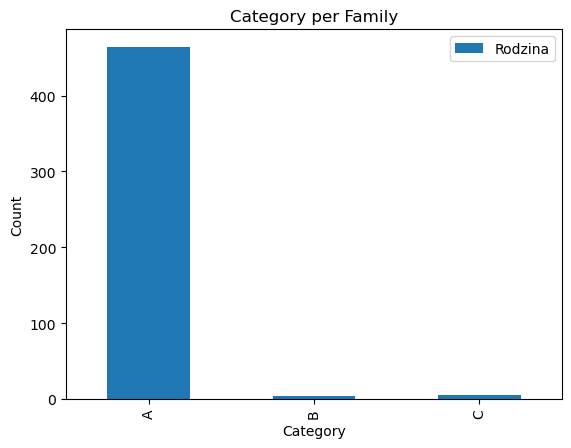

In [193]:
grouped.plot(kind= 'bar', title= 'Category per Family', xlabel= 'Category', ylabel= 'Count')

In [175]:
grouped = df.groupby(['Rodzina','Kat. AERC']).count()
grouped

,,Nazwa polska,Nazwa łacińska,Status gatunku w Polsce,Ochrona w Polsce
Rodzina,Kat. AERC,,,,
alki (Alcidae),A,6,6,6,6
bekasowate (Scolopacidae),A,41,41,41,40
bociany (Ciconiidae),A,2,2,2,2
burzykowate (Procellariidae),A,5,5,5,5
chruściele (Rallidae),A,7,7,7,7
...,...,...,...,...,...
świerszczaki (Locustellidae),A,4,4,4,4
świstunki (Phylloscopidae),A,12,12,12,12
żołny (Meropidae),A,1,1,1,1


In [185]:
# grouped['Nazwa polska'].plot(kind= 'bar', subplots= True)

In [186]:
# grouped['Nazwa polska'].plot(kind= 'bar', stacked= True)

In [187]:
# grouped['Nazwa polska'].plot.barh(stacked= True)

<Axes: ylabel='Rodzina'>

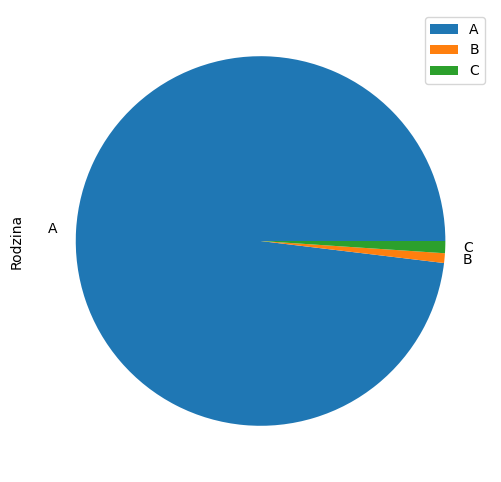

In [197]:
# df.plot.scatter(x= 'X', y= 'Y', s= 500, c= 'Yellow')
# df.plot.hist(bins= 20)
# df.boxplot()
# df.plot.area(figsize= (10,5))
grouped.plot.pie(y= 'Rodzina', figsize = (10,6))

In [198]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: ylabel='Rodzina'>

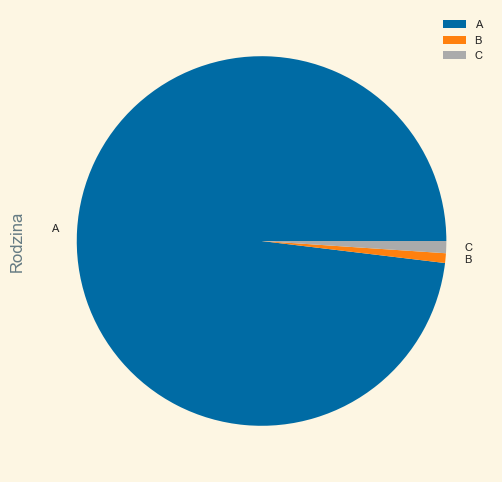

In [206]:
plt.style.use('tableau-colorblind10')
grouped.plot.pie(y= 'Rodzina', figsize = (10,6))

<h2>End</h2>